Plots to check script to measure CG bias  
Unit tests in tests.py  
Notebook shows plots to verify that we get CG bias results as expected.
Notebook also shows CG bias measurements with reference parametric galaxy at differnt redhisfts,
with seeing + DCR dominated PSF, in r and i band.
All computations are done for noise free simualtions

In [1]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
import galsim
import os
parentdir = os.path.abspath("..")
os.sys.path.insert(0,parentdir) 
import cg_functions as cg_fn
from astropy.table import Table

plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)


In [2]:
# Plots to be saved at
plot_path = parentdir + '/plots/'

Tests  
1. Different HSM methods
1. Weight function
1. PSF size
1. PSF alpha  
1. Chromatic Atmosphere PSF
1. I band results
1. With emission lines


## Different HSM methods

Verify that the CG bias measurement with different shape measurement algorithm gives the same CG bias value

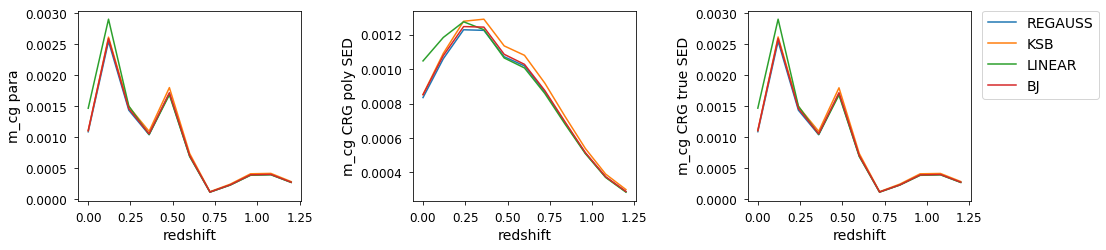

In [8]:
methods = ['REGAUSS', 'KSB', 'LINEAR', 'BJ']
cat={}

for method in methods:
    name =parentdir + '/results/ref_gal_cg_bias_{0}_r_band.fits'.format(method)
    cat[method] = Table.read(name, format='fits')
plt.figure(figsize=[16,14])
plt.subplot(3,3,1)
for method in methods:
    plt.plot(cat[method]['redshift'], cat[method]['para_m1'].T[2], label=method)
plt.xlabel('redshift')
plt.ylabel('m_cg para')

plt.subplot(3,3,2)
for method in methods:
    plt.plot(cat[method]['redshift'], cat[method]['CRG_m1'].T[2], label=method)
plt.xlabel('redshift')
plt.ylabel('m_cg CRG poly SED')

plt.subplot(3,3,3)
for method in methods:
    plt.plot(cat[method]['redshift'], cat[method]['CRG_tru_m1'].T[2], label=method)
plt.xlabel('redshift')
plt.ylabel('m_cg CRG true SED')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

## weight function

CG bias caused by weight functions in shape measurement. As weight function size becomes larger the CG bias goes to zero. 

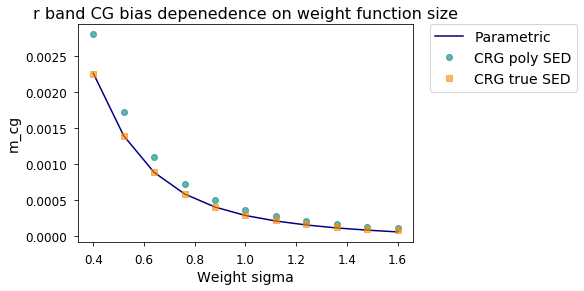

In [3]:
name =parentdir + '/results/ref_gal_cg_bias_var_weight_r_band.fits'
cat = Table.read(name, format='fits')
plt.plot(cat['weight_sigma'], cat['para_m1'].T[2],
             '-', label='Parametric', color='navy')
plt.plot(cat['weight_sigma'], cat['CRG_m1'].T[2],
         'o',label='CRG poly SED',color='teal', alpha=0.6)
plt.plot(cat['weight_sigma'], cat['CRG_tru_m1'].T[2],
         's',label='CRG true SED', color='Darkorange', alpha=0.6)
plt.xlabel('Weight sigma')
plt.ylabel('m_cg')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('r band CG bias depenedence on weight function size')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## LSST PSF Size test

Measure effct of PSF size on CG bias

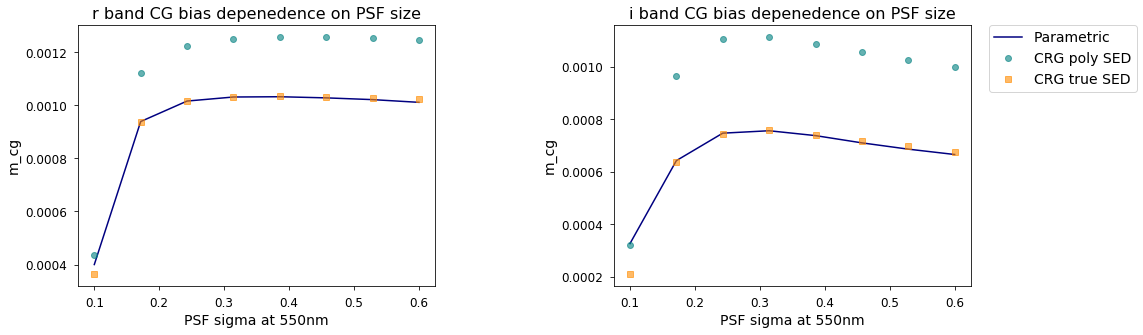

In [6]:
plt.figure(0,figsize=[16,12])
plt.subplot(2,2,1)
cat = Table.read(parentdir + '/results/ref_gal_cg_bias_var_psig_r_band.fits', format='fits')
plt.plot(cat['psf_sigma'], cat['para_m1'].T[2],
             '-', label='Parametric', color='navy')
plt.plot(cat['psf_sigma'], cat['CRG_m1'].T[2],
         'o',label='CRG poly SED',color='teal', alpha=0.6)
plt.plot(cat['psf_sigma'], cat['CRG_tru_m1'].T[2],
         's',label='CRG true SED', color='Darkorange', alpha=0.6)
plt.xlabel('PSF sigma at 550nm')
plt.ylabel('m_cg')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('r band CG bias depenedence on PSF size')

plt.subplot(2,2,2)
cat = Table.read(parentdir + '/results/ref_gal_cg_bias_var_psig_i_band.fits', format='fits')
plt.plot(cat['psf_sigma'], cat['para_m1'].T[2],
             '-', label='Parametric', color='navy')
plt.plot(cat['psf_sigma'], cat['CRG_m1'].T[2],
         'o',label='CRG poly SED',color='teal', alpha=0.6)
plt.plot(cat['psf_sigma'], cat['CRG_tru_m1'].T[2],
         's',label='CRG true SED', color='Darkorange', alpha=0.6)
plt.xlabel('PSF sigma at 550nm')
plt.ylabel('m_cg')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('i band CG bias depenedence on PSF size')

## LSST PSF alpha 

Measure effct of PSF size wavelength dependence exponent alpha on CG bias. For exponent=0, CG bias must go to zero

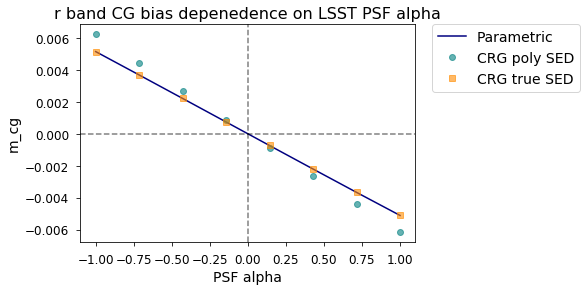

In [20]:
cat = Table.read(parentdir + '/results/ref_gal_cg_bias_var_alpha_r_band.fits', format='fits')
plt.plot(cat['alpha'], cat['para_m1'].T[2],
             '-', label='Parametric', color='navy')
plt.plot(cat['alpha'], cat['CRG_m1'].T[2],
         'o',label='CRG poly SED',color='teal', alpha=0.6)
plt.plot(cat['alpha'], cat['CRG_tru_m1'].T[2],
         's',label='CRG true SED', color='Darkorange', alpha=0.6)
plt.xlabel('PSF alpha')
plt.ylabel('m_cg')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('r band CG bias depenedence on LSST PSF alpha')
plt.axhline(0, c='k', linestyle='--', alpha=0.5)
plt.axvline(0, c='k', linestyle='--', alpha=0.5)

## Chromatic Atmosphere PSF

Compare CG bias with LSST PSF from atmosphere seeing only, to bias with seeing_DCR PSF 

At redhsift=0.3

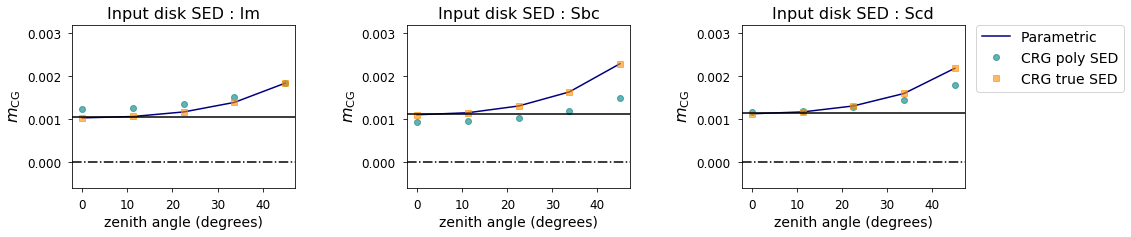

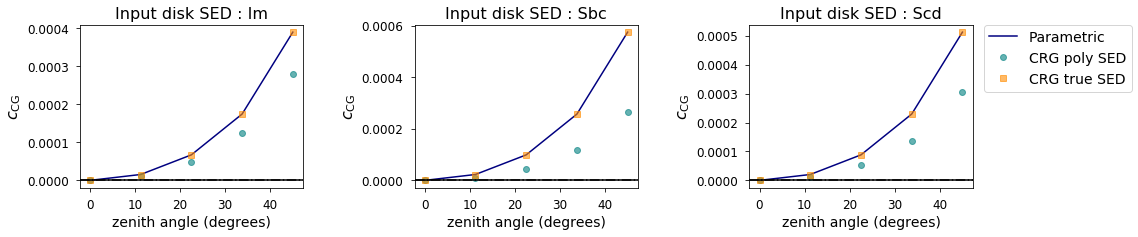

In [13]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir +'/results/ref_gal_atm_psf_{0}_dsed_r_band.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    xp = cat1[dSED]['redshift']
    fp = cat1[dSED]['para_m1'].T[2]
    val = np.interp(0.3,xp,fp)
    angles = cat2[dSED]['zenith_angle']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(angles, cat2[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    plt.plot(angles, cat2[dSED]['CRG_m1'].T[2],
             'o',label='CRG poly SED',color='teal', alpha=0.6)
    plt.plot(angles, cat2[dSED]['CRG_tru_m1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(val, linestyle= '-', c='k')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('zenith angle (degrees)', size=14)
    plt.ylabel(r'$m_{\rm CG}$', size=16)
    plt.title("Input disk SED : %s"%dSED, size=16)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(plot_path + "ref_gal_atm_psf.png", 
#             bbox_inches='tight')

plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    xp = cat1[dSED]['redshift']
    fp = cat1[dSED]['para_c1'].T[2]
    val = np.interp(0.3,xp,fp)
    angles = cat2[dSED]['zenith_angle']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(angles, cat2[dSED]['para_c1'].T[2],
             '-', label='Parametric', color='navy')
    plt.plot(angles, cat2[dSED]['CRG_c1'].T[2],
             'o',label='CRG poly SED',color='teal', alpha=0.6)
    plt.plot(angles, cat2[dSED]['CRG_tru_c1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(val, linestyle= '-', c='k')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('zenith angle (degrees)', size=14)
    plt.ylabel(r'$c_{\rm CG}$', size=16)
    plt.title("Input disk SED : %s"%dSED, size=16)
    # plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(plot_path + "ref_gal_atm_psf.png", 
#             bbox_inches='tight')



At redhsift=0.42

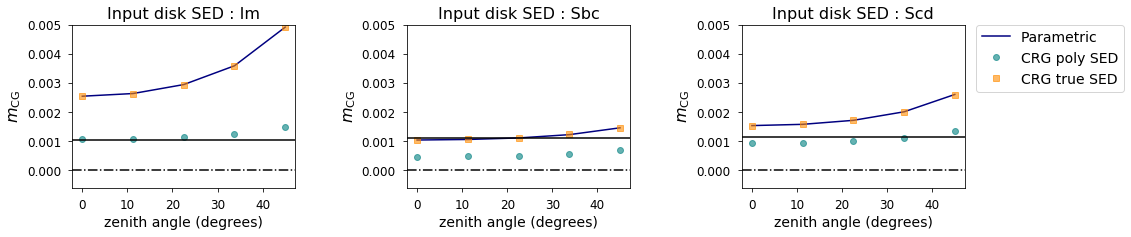

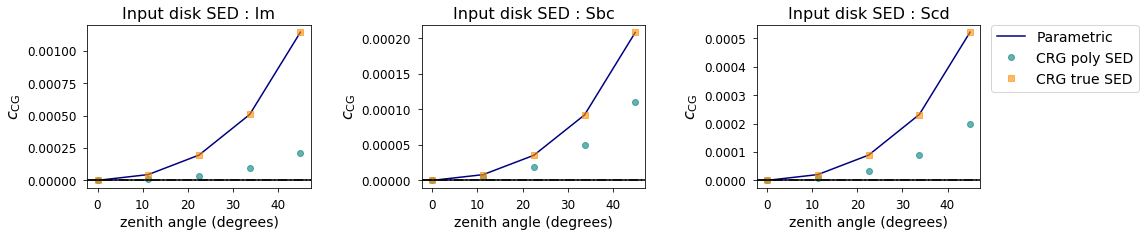

In [4]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir +'/results/ref_gal_atm_psf_{0}_dsed_r_band2.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    xp = cat1[dSED]['redshift']
    fp = cat1[dSED]['para_m1'].T[2]
    val = np.interp(0.3,xp,fp)
    angles = cat2[dSED]['zenith_angle']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(angles, cat2[dSED]['para_m1'].T[2],
             '-', label='Parametric', color='navy')
    plt.plot(angles, cat2[dSED]['CRG_m1'].T[2],
             'o',label='CRG poly SED',color='teal', alpha=0.6)
    plt.plot(angles, cat2[dSED]['CRG_tru_m1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(val, linestyle= '-', c='k')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('zenith angle (degrees)', size=14)
    plt.ylabel(r'$m_{\rm CG}$', size=16)
    plt.title("Input disk SED : %s"%dSED, size=16)
    plt.ylim([-0.0006, 0.005])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(plot_path + "ref_gal_atm_psf.png", 
#             bbox_inches='tight')




plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    xp = cat1[dSED]['redshift']
    fp = cat1[dSED]['para_c1'].T[2]
    val = np.interp(0.3,xp,fp)
    angles = cat2[dSED]['zenith_angle']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(angles, cat2[dSED]['para_c1'].T[2],
             '-', label='Parametric', color='navy')
    plt.plot(angles, cat2[dSED]['CRG_c1'].T[2],
             'o',label='CRG poly SED',color='teal', alpha=0.6)
    plt.plot(angles, cat2[dSED]['CRG_tru_c1'].T[2],
             's',label='CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(val, linestyle= '-', c='k')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('zenith angle (degrees)', size=14)
    plt.ylabel(r'$c_{\rm CG}$', size=16)
    plt.title("Input disk SED : %s"%dSED, size=16)
    # plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(plot_path + "ref_gal_atm_psf.png", 
#             bbox_inches='tight')




## CG bias in  I band
CG bias measurements in I band shows a lower bias than in r band. This is due to a combination of multiple things:
1. i band is narrower  
2. PSF in i band is slightly smaller  
3. Most important: When SED is redshifted, the "chromatic features are diluted"



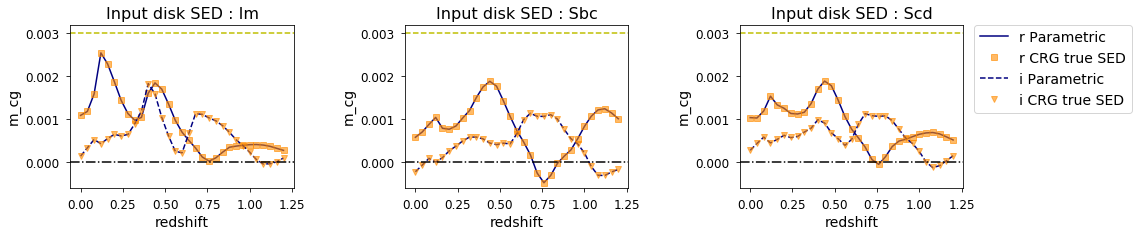

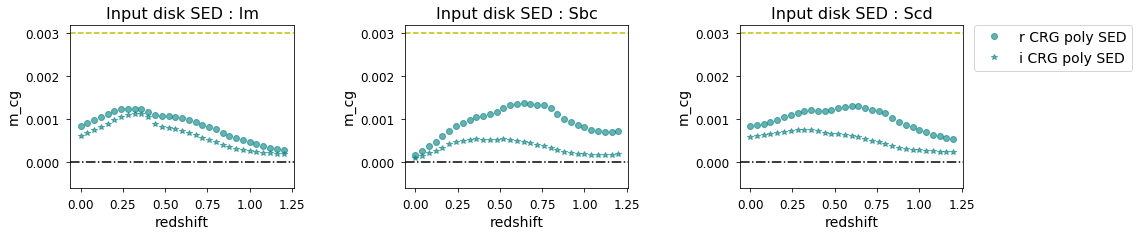

In [7]:
dSEDs = ['Im', 'Sbc', 'Scd']
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir +'/results/ref_gal_cg_bias_{0}_dsed_i_band.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['para_m1'].T[2],
             '-', label='r Parametric', color='navy')
    plt.plot(redshifts, cat1[dSED]['CRG_tru_m1'].T[2],
             's',label='r CRG true SED', color='Darkorange', alpha=0.6)
    plt.plot(redshifts, cat2[dSED]['para_m1'].T[2],
             '--', label='i Parametric', color='navy')
    plt.plot(redshifts, cat2[dSED]['CRG_tru_m1'].T[2],
             'v',label='i CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


plt.figure(figsize=[16,12])
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['CRG_m1'].T[2],
             'o',label='r CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts, cat2[dSED]['CRG_m1'].T[2],
             '*',label='i CRG poly SED',color='teal', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)







For Im SED , peak at 0.12 in r band is observed at 0.4 in i band, but has smaller magnitude.  
To test reson 3, r band is redshifted to overlap with i band. The bandpass value in the r band is shifted by adding 140 nm. So thw width of the band is the same, but it spans higher wavelengths.  
Result: r band shifted still has lower bias than the actual r band.

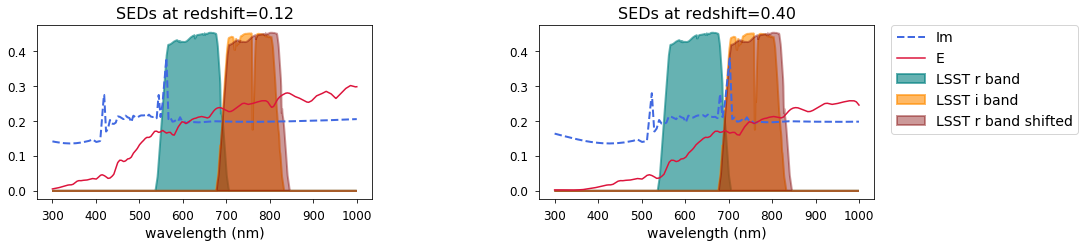

In [10]:
x=np.linspace(300,1000,1000)
disk_SED_name='Im'
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
filt_r = galsim.Bandpass( parentdir + '/data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass(parentdir + '/data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)
# r band shifted
w = filt_r.wave_list
new_r = galsim.Bandpass(galsim.LookupTable(w+140, filt_r.func(w)),wave_type='nm' )


plt.figure(figsize=[15,8])    
plt.subplot(2,2,1)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.12)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
             c=colors[0], linestyle='--')
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.fill(x,new_r(x), alpha=0.4, color='maroon', label='LSST r band shifted',linewidth=2)

plt.subplot(2,2,2)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
         c=colors[0], linestyle='--')
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.fill(x,new_r(x), alpha=0.4, color='maroon', label='LSST r band shifted',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

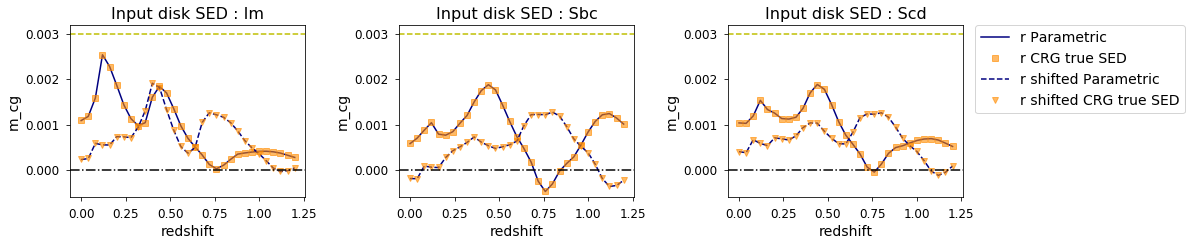

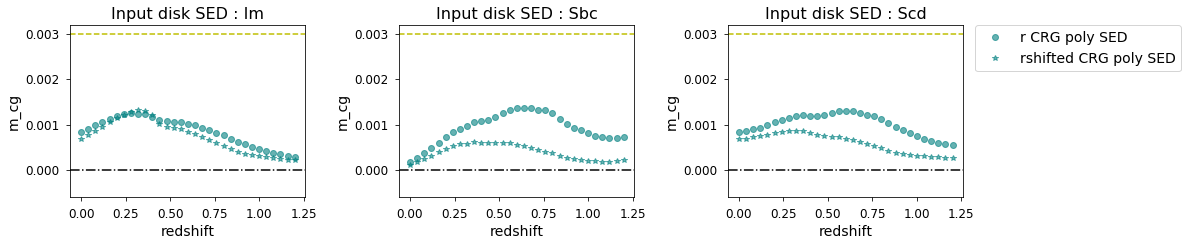

In [11]:
dSEDs = ['Im', 'Sbc', 'Scd']
#dSEDs = ['Im',]
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band_shifted.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(0,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['para_m1'].T[2],
             '-', label='r Parametric', color='navy')
    plt.plot(redshifts, cat1[dSED]['CRG_tru_m1'].T[2],
             's',label='r CRG true SED', color='Darkorange', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['para_m1'].T[2],
             '--', label='r shifted Parametric', color='navy')
    plt.plot(redshifts2, cat2[dSED]['CRG_tru_m1'].T[2],
             'v',label='r shifted CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.figure(1,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['CRG_m1'].T[2],
             'o',label='r CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['CRG_m1'].T[2],
             '*',label='rshifted CRG poly SED',color='teal', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)





Bias is lower for the shifted r band => narrowness isn't the main reason for low i band CG bias. PSF size for r band and r band shifted is almost the same and CG bias does not heavily depend on PSF size  

Reason for i band CG bias being smaller is the streching of SEDs as they are redshifted.(but width of bandpass remains the same)
Look at SEDs : bulge SED in r band at z=0.12 has more features than the SED in r band shifted for redshift=0.4. The bulge is brighter for z=0.12 in r band than, z=0.4 in r shifted band => larger CG => larger CG bias.

Looking at galaxy image at different redshift in r band and compare to how different r band image and equivalent r band shifted image, helps understand this better. Galaxy image at z=0.12 in r band looks similar to r band shifted at z=0.4 but will have differnt CG bias. m_CG is determined by the tiny difference in shape caused by the slightly differnt SED within the filter.

Even though r band at z=0.42 has same cg bias as in r band shifted at z=0.4, their profiles are different. Its co-incidence that m_cg is similar.  

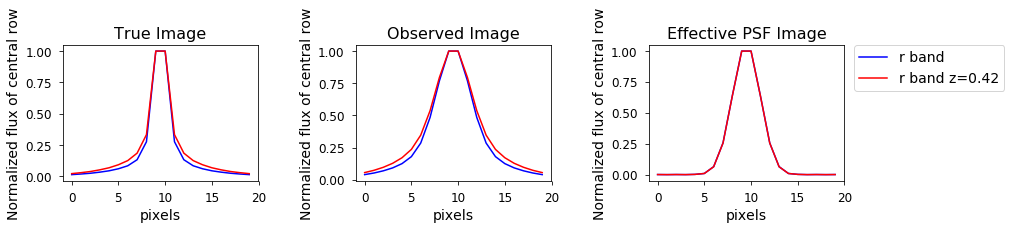

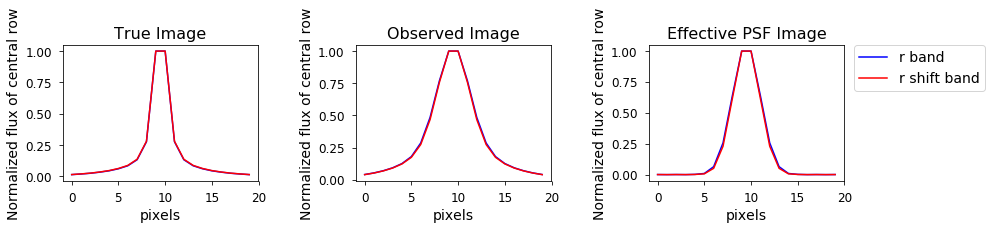

In [12]:
in_p = cg_fn.LSST_Args(redshift=0.12)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
gal = cg_fn.get_gal_cg(in_p)
psf_args = cg_fn.psf_params()
PSF =  cg_fn.get_gaussian_PSF(psf_args)
con = galsim.Convolve([gal, PSF])
true_gal_im_r = gal.drawImage(filt_r, nx=20, ny=20, scale=0.2)
obs_gal_im_r = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)
psf_r = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)

in_p = cg_fn.LSST_Args(redshift=0.42)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
gal = cg_fn.get_gal_cg(in_p)
psf_args = cg_fn.psf_params()
PSF =  cg_fn.get_gaussian_PSF(psf_args)
con = galsim.Convolve([gal, PSF])
true_gal_im_r_z = gal.drawImage(filt_r, nx=20, ny=20, scale=0.2)
obs_gal_im_r_z = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)
psf_r_z = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)

plt.figure(figsize=[14,10])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
plt.plot(true_gal_im_r.array[10]/max(true_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(true_gal_im_r_z.array[10]/max(true_gal_im_r_z.array[10]), c='r',
         label='r band z=0.42')
plt.title('True Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,2)
plt.plot(obs_gal_im_r.array[10]/max(obs_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(obs_gal_im_r_z.array[10]/max(obs_gal_im_r_z.array[10]), c='r',
         label='r band z=0.42')
plt.title('Observed Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,3)
plt.plot(psf_r.image.array[10]/max(psf_r.image.array[10]), c='b',
         label='r band')
plt.plot(psf_r_z.image.array[10]/max(psf_r_z.image.array[10]), c='r',
         label='r band z=0.42')
plt.title('Effective PSF Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




w = filt_r.wave_list
new_r = galsim.Bandpass(galsim.LookupTable(w+140, filt_r.func(w)),wave_type='nm' )
in_p = cg_fn.LSST_Args(redshift=0.4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
gal = cg_fn.get_gal_cg(in_p)
con = galsim.Convolve([gal, PSF])
true_gal_im_r_shift = gal.drawImage(new_r, nx=20, ny=20, scale=0.2)
obs_gal_im_r_shift = con.drawImage(new_r, nx=20, ny=20, scale=0.2)
psf_r_shift = cg_fn.get_eff_psf(PSF, in_p.c_SED, new_r,
                          scale=0.2, nx=20, ny=20)
plt.figure(figsize=[14,10])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
plt.plot(true_gal_im_r.array[10]/max(true_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(true_gal_im_r_shift.array[10]/max(true_gal_im_r_shift.array[10]), c='r',
         label='i band')
plt.title('True Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,2)
plt.plot(obs_gal_im_r.array[10]/max(obs_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(obs_gal_im_r_shift.array[10]/max(obs_gal_im_r_shift.array[10]), c='r',
         label='i band')
plt.title('Observed Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,3)
plt.plot(psf_r.image.array[10]/max(psf_r.image.array[10]), c='b',
         label='r band')
plt.plot(psf_r_shift.image.array[10]/max(psf_r_shift.image.array[10]), c='r',
         label='r shift band')
plt.title('Effective PSF Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Effect of narrower i band is small
Comapre i band CG bias to r band shifted

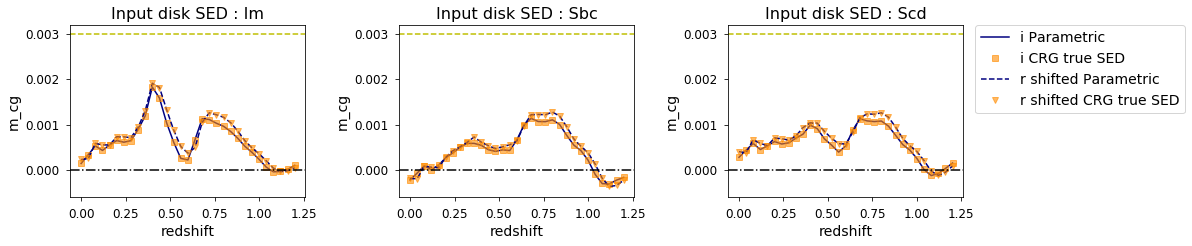

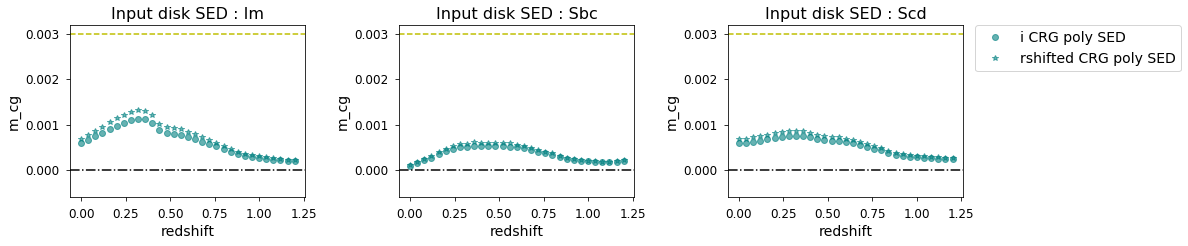

In [13]:
dSEDs = ['Im', 'Sbc', 'Scd']
#dSEDs = ['Im',]
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_i_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band_shifted.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(0,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['para_m1'].T[2],
             '-', label='i Parametric', color='navy')
    plt.plot(redshifts, cat1[dSED]['CRG_tru_m1'].T[2],
             's',label='i CRG true SED', color='Darkorange', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['para_m1'].T[2],
             '--', label='r shifted Parametric', color='navy')
    plt.plot(redshifts2, cat2[dSED]['CRG_tru_m1'].T[2],
             'v',label='r shifted CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


plt.figure(1,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['CRG_m1'].T[2],
             'o',label='i CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['CRG_m1'].T[2],
             '*',label='rshifted CRG poly SED',color='teal', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)






Addition test would be to "redshift the r band" instead of just shifting it by adding 140nm. The r band is instead multiplied by a factor of 0.25. The value was selected so as to allign the emmission line peak in r band at redshit 0.12 to the same peak when observed at redshift 0.4 in r band shifted. 

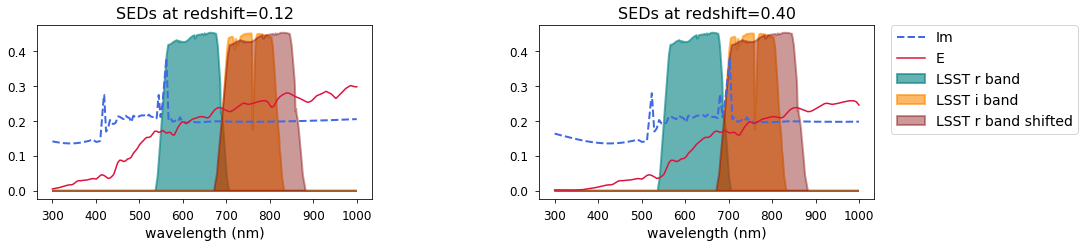

In [6]:
x=np.linspace(300,1000,1000)
disk_SED_name='Im'
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
filt_r = galsim.Bandpass( parentdir + '/data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass(parentdir + '/data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)
# r band shifted
w = filt_r.wave_list
new_r = galsim.Bandpass(galsim.LookupTable(w*(1+0.25), filt_r.func(w)),wave_type='nm' )


plt.figure(figsize=[15,8])    
plt.subplot(2,2,1)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.12)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
             c=colors[0], linestyle='--')
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.fill(x,new_r(x), alpha=0.4, color='maroon', label='LSST r band shifted',linewidth=2)

plt.subplot(2,2,2)
in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name, redshift=0.4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
         c=colors[0], linestyle='--')
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)
plt.title('SEDs at redshift={:.2f}'.format(in_p.redshift), size=16)
plt.fill(x,filt_r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.fill(x,new_r(x), alpha=0.4, color='maroon', label='LSST r band shifted',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

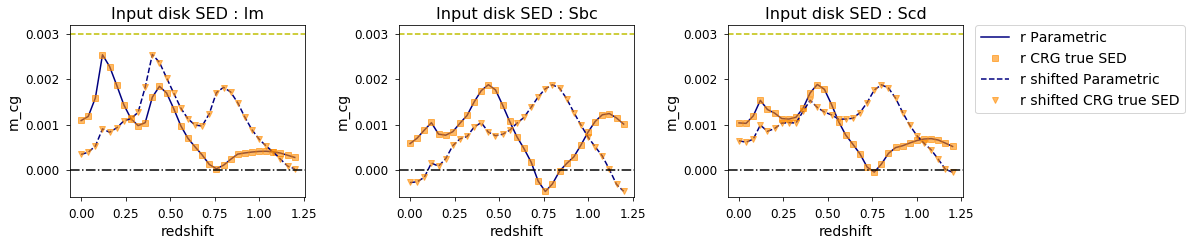

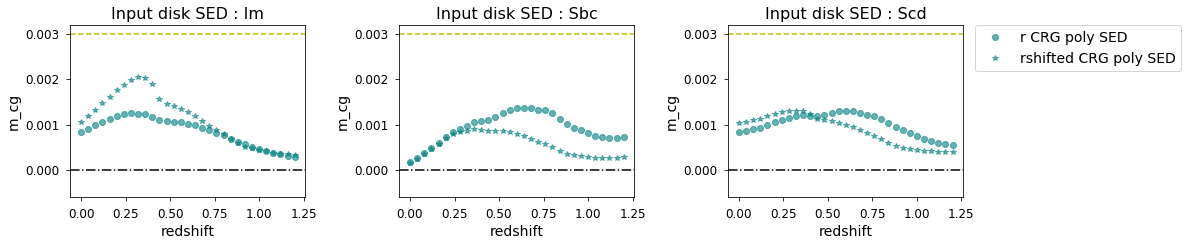

In [6]:
dSEDs = ['Im', 'Sbc', 'Scd']
#dSEDs = ['Im',]
cat1, cat2 = {}, {}
for dSED in dSEDs :
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band.fits'.format(dSED)
    cat1[dSED] = Table.read(name,format='fits')
    name = parentdir + '/results/ref_gal_cg_bias_{0}_dsed_r_band_0.25_redshifted.fits'.format(dSED)
    cat2[dSED] = Table.read(name,format='fits')

plt.figure(0,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['para_m1'].T[2],
             '-', label='r Parametric', color='navy')
    plt.plot(redshifts, cat1[dSED]['CRG_tru_m1'].T[2],
             's',label='r CRG true SED', color='Darkorange', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['para_m1'].T[2],
             '--', label='r shifted Parametric', color='navy')
    plt.plot(redshifts2, cat2[dSED]['CRG_tru_m1'].T[2],
             'v',label='r shifted CRG true SED', color='Darkorange', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.figure(1,figsize=[16,12])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)
for i,dSED in enumerate(dSEDs) :
    redshifts = cat1[dSED]['redshift']
    redshifts2 = cat2[dSED]['redshift']
    plt.subplot(len(dSEDs),len(dSEDs),i+1)
    plt.plot(redshifts, cat1[dSED]['CRG_m1'].T[2],
             'o',label='r CRG poly SED',color='teal', alpha=0.6)
    plt.plot(redshifts2, cat2[dSED]['CRG_m1'].T[2],
             '*',label='rshifted CRG poly SED',color='teal', alpha=0.6)
    plt.axhline(0, linestyle= '-.', c='k')
    plt.axhline(0.003, linestyle= '--', c='y')
    #plt.axhline(o, linestyle= '--', c='y')
    plt.xlabel('redshift')
    plt.ylabel('m_cg')
    plt.title("Input disk SED : %s"%dSED)
    plt.ylim([-0.0006, 0.0032])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)






m_CG for parametric and CRG with true SED now have same value for r band and r band shifted with a phase difference of z=0.28 (0.4-0.12). i.e the peak m_cg value at z=0.12 for band is the same as the m_cg value at z=0.4 for r band shifted. 


Since the galaxy created with polynomials SED CRG depends on V and I bands, we do not expect them to perfectly allign. 

## With emission lines

In [ ]:
from astropy.table import vstack,join

In [42]:
# Code to add extinction lines to disk SEDs


import extinction
def get_catsim_SED(sed_name, redshift=0., a_v=None,
                   r_v=3.1, model='ccm89'):
    """Returns SED of a galaxy in CatSim catalog corrected for redshift and
    extinction.
    @param sed_file    Name of file with SED information.
    @flux_norm         Multiplicative scaling factor to apply to the SED.
    @bandpass          GalSim bandpass object which models the transmission
                       fraction.
    @ redshift         Redshift of the galaxy.
    @a_v               Total V band extinction, in magnitudes.
    @r_v               Extinction R_V parameter.
    @model             Dust model name in the object's rest frame.
    """
    sed_path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/LSST_cat/galaxySED/'
    full_sed_name = sed_path + sed_name + '.gz'
    SED = galsim.SED(full_sed_name, wave_type='nm',
                     flux_type='flambda').thin(rel_err=1e-4)
    SED = redden(SED, a_v, r_v, model=model)
    SED = SED.atRedshift(redshift)
    return SED


def get_UV_flux(SED):
    # flambda in erg/s/cm^2/nm
    UV_flambda = np.interp(230.0, SED[0], SED[1])
    # convert to erg/s/Hz
    c = 29979245800.0  # cm/s
    nm_to_cm = 1.0e-7
    UV_fnu = UV_flambda * (230.0)**2 / c * nm_to_cm
    return UV_fnu


def add_emission_lines(sed_name, sed_norm):
    sed_path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/LSST_cat/galaxySED/'
    full_sed_name = sed_path + sed_name + '.gz'
    SED = np.loadtxt(full_sed_name).T
    SED[1] *= sed_norm
    in_wave = SED[0]
    flambda = SED[1] 
    UV_fnu = get_UV_flux(SED)
    lines = ['OII', 'OIII', 'Hbeta', 'Halpha', 'Lya']
    multipliers = np.array([1.0, 0.36, 0.61, 1.77, 2.0]) * 1.e13
    waves = [372.7, 500.7, 486.1, 656.3, 121.5]
    velocity = 200.0  # km/s
    for line, m, w in zip(lines, multipliers, waves):
        flux = UV_fnu * m
        sigma = velocity / 299792.458 * w  # sigma in Angstroms
        amplitude = flux / sigma / np.sqrt(2.0 * np.pi)
        flambda += amplitude * np.exp(-(w - in_wave)**2 / (2 * sigma**2))
    new_SED = galsim.SED(galsim.LookupTable(in_wave, flambda),
                         wave_type='nm', flux_type='flambda').thin(rel_err=1e-4)
    return new_SED


def get_catsim_SED_with_em_line(sed_name, sed_norm,
                                redshift, a_v=None,
                                r_v=3.1, model='ccm89'):
    """Returns SED of a galaxy in CatSim catalog corrected for redshift and
    extinction.
    @param sed_file    Name(wih path) of file with SED information.
    @flux_norm         Multiplicative scaling factor to apply to the SED.
    @bandpass          GalSim bandpass object which models the transmission
                       fraction.
    @ redshift         Redshift of the galaxy.
    @a_v               Total V band extinction, in magnitudes.
    @r_v               Extinction R_V parameter.
    @model             Dust model name in the object's rest frame.
    """
    SED = add_emission_lines(sed_name, sed_norm)
    SED = redden(SED, a_v, r_v, model=model)
    SED = SED.atRedshift(redshift)
    return SED

def redden(SED, a_v, r_v, model):
    """ Returns a new SED with the specified extinction applied.  Note that
    this will truncate the wavelength range to lie between 91 nm and 6000 nm
    where the extinction correction law is defined.
    Catsim SED has bluelimit 16nm, so make sure we don't use high z
    ## Do not use redshifts higher than 1.4 !!!!!!!!!
    """
    return SED * (lambda w: 1 if np.any(w < 125) else 1 / extinction.reddening(w * 10, a_v=a_v,
                                                                               r_v=r_v, model=model))

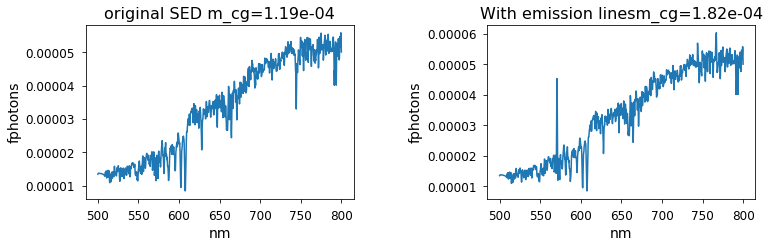

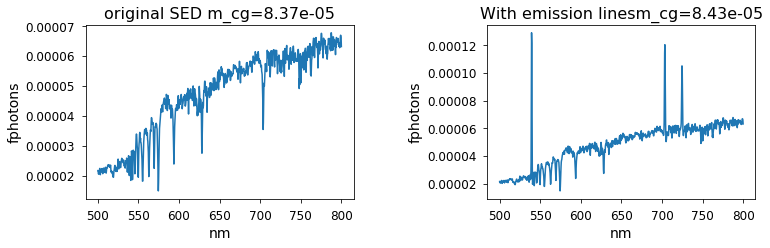

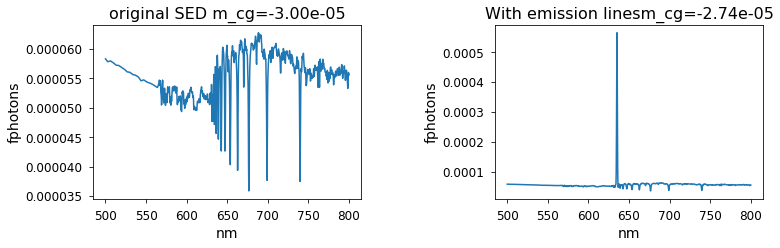

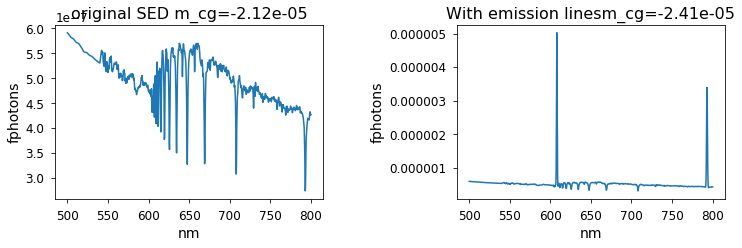

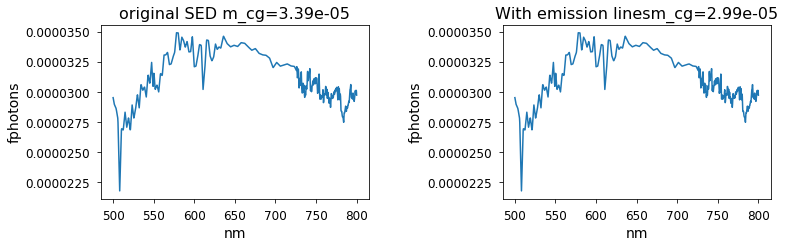

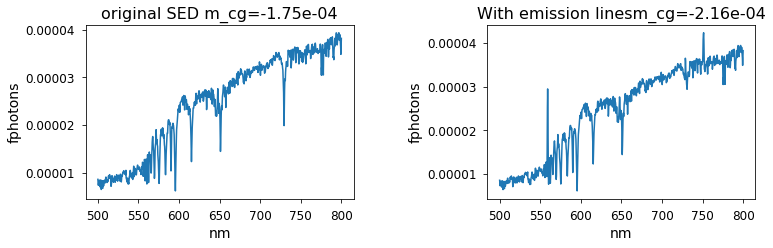

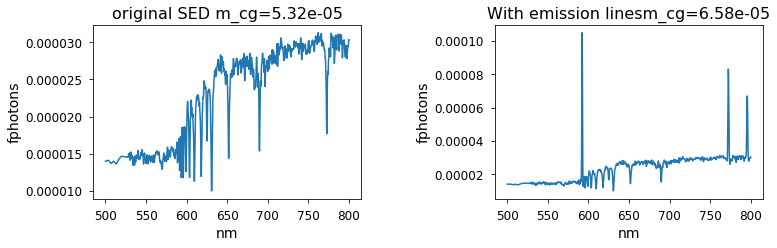

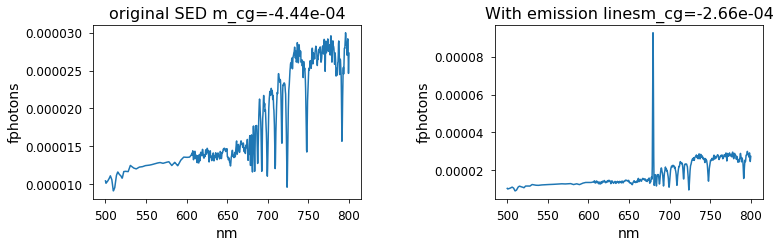

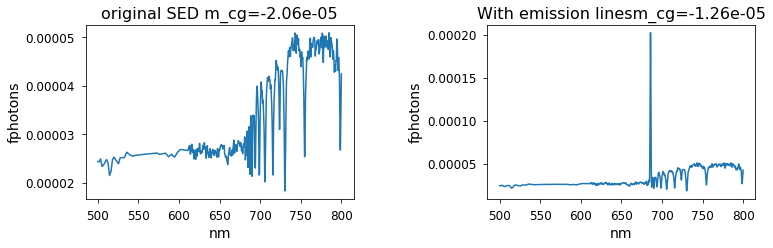

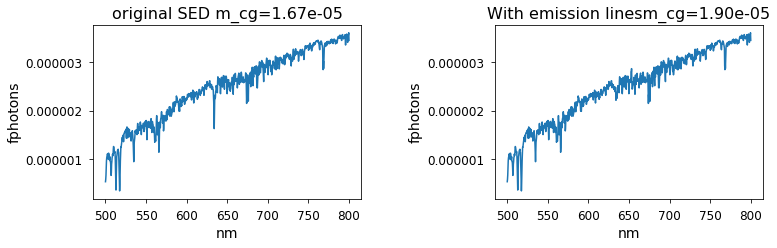

In [59]:
for i in range(10,20):
    sed_path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/LSST_cat/galaxySED/'
    full_sed_name = sed_path + cat['sedname_disk'][i] + '.gz'
    #  print full_sed_name
    norm = com_cat['fluxnorm_disk'][i]
    SED = get_catsim_SED(com_cat['sedname_disk'][i], redshift=com_cat['redshift'][i],
                                a_v=com_cat['av_d'][i], r_v=com_cat['rv_d'][i],
                                model='ccm89') * norm
    new_SED = get_catsim_SED_with_em_line(com_cat['sedname_disk'][i], norm,
                                             redshift=com_cat['redshift'][i],
                                             a_v=com_cat['av_d'][i], r_v=com_cat['rv_d'][i],
                                             model='ccm89')
    x=np.linspace(500,800,100)
    y1 = SED(x)
    y2 = new_SED(x)
    plt.figure(figsize=[12,8])
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(221)
    plt.plot(x,y1)
    plt.xlabel('nm')
    plt.ylabel('fphotons')
    plt.title('original SED m_cg={:.2e}'.format(com_cat['m_para1'][i].T[2]))
    plt.subplot(222)
    plt.plot(x,y2)
    plt.xlabel('nm')
    plt.ylabel('fphotons')
    plt.title('With emission linesm_cg={:.2e}'.format(com_cat['para_m1'][i].T[2]))
    


In [ ]:
cat=Table()
numbers = [0,1,2,4, 55, 75]
for i in numbers:
    path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/catsim_results/'
    name = path + 'catsim_with_em_lines_%i_r_band.fits'%i
    temp = Table.read(name, format='fits')
    cat=vstack([cat,temp])

cg_bias_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_catsim_cg_bias_only.fits', format='fits')

com_cat = join(cg_bias_cat, cat, keys='C_galtileid')

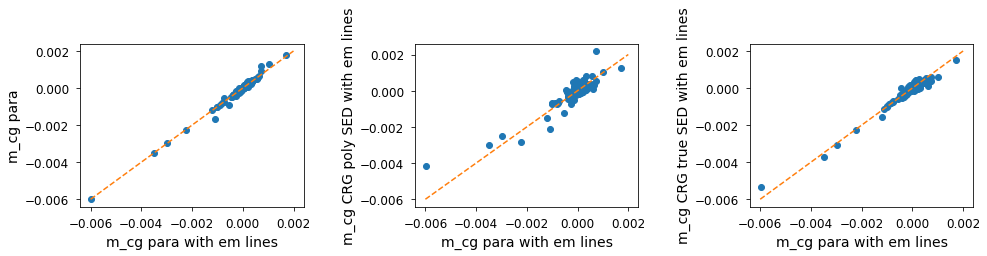

In [31]:
plt.figure(figsize=[16,12])
plt.subplot(3,3,1)
plt.plot(com_cat['para_m1'].T[2], com_cat['m_para1'].T[2], 'o')
plt.ylabel('m_cg para')
plt.xlabel('m_cg para with em lines')
plt.plot([-0.006, 0.002],[-0.006, 0.002], '--')

plt.subplot(3,3,2)
plt.plot(com_cat['para_m1'].T[2], com_cat['CRG_m1'].T[2], 'o')
plt.xlabel('m_cg para with em lines')
plt.ylabel('m_cg CRG poly SED with em lines')
plt.plot([-0.006, 0.002],[-0.006, 0.002], '--')

plt.subplot(3,3,3)
plt.plot(com_cat['para_m1'].T[2], com_cat['CRG_tru_m1'].T[2], 'o')
plt.xlabel('m_cg para with em lines')
plt.ylabel('m_cg CRG true SED with em lines')
plt.plot([-0.006, 0.002],[-0.006, 0.002], '--')